In [1]:
import tensorflow as tf
import sys
sys.path.append('../')
from data_processing.stl10 import get_stl10

In [2]:
import numpy as np
from models import resnet18 
from models import model 
import importlib
importlib.reload(resnet18)
importlib.reload(model)

batch_size = 128
epochs = 2
num_classes = 10 
saved_model_path = 'saved_model'

ds, num_samples = get_stl10('train', batch_size=batch_size)
dp = model.SiameseNetwork(num_classes)
dp.compile()
# dp.train(ds.take(2), epochs=epochs, save_path=saved_model_path)
dp(ds.take(1))

ValueError: Attempt to convert a value (<TakeDataset shapes: (None, 224, 224, 3), types: tf.float32>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>) to a Tensor.

In [6]:
for img in ds.take(1):
    x = img
dp(x)

<tf.Tensor: shape=(128, 128), dtype=float32, numpy=
array([[ 0.00193617,  0.00111407,  0.04337511, ...,  0.01550498,
        -0.02557641,  0.00731706],
       [ 0.0037309 , -0.00167971,  0.06171486, ...,  0.01955489,
        -0.03469916,  0.00794681],
       [ 0.00684146,  0.00018623,  0.0588045 , ...,  0.0216886 ,
        -0.03328674,  0.01082723],
       ...,
       [ 0.00582117, -0.00099753,  0.05113315, ...,  0.01757   ,
        -0.03053855,  0.01047238],
       [ 0.00778255,  0.00042203,  0.05275827, ...,  0.01869608,
        -0.03033698,  0.00889625],
       [ 0.00504052,  0.00176634,  0.03909425, ...,  0.01358489,
        -0.02316043,  0.00688334]], dtype=float32)>

In [2]:
import importlib
importlib.reload(resnet18)
importlib.reload(model)

dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=epochs, batch_size=batch_size, save_path='saved_model')

NameError: name 'resnet18' is not defined

Epoch 1/4
2/2 [==============================] - 35s 15s/step - loss: 1.9477
Epoch 2/4
2/2 [==============================] - 44s 18s/step - loss: 1.9297
Epoch 3/4
2/2 [==============================] - 36s 18s/step - loss: 1.9046
Epoch 4/4
2/2 [==============================] - 38s 18s/step - loss: 1.9263


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


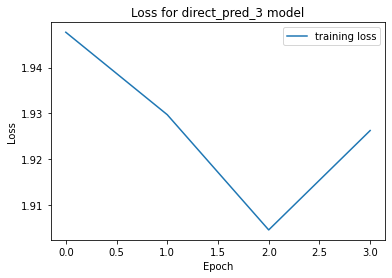

In [ ]:
dp = model.DirectPred(num_classes)
dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=4, batch_size=batch_size, save_path='saved_model')